In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error , mean_absolute_error , mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




### **One-Hot Encoding of Categorical Features**

The following code performs one-hot encoding on the categorical features in the DataFrame `df`:

1. **Define Categorical Features**:
   - We have three categorical features: `'sex'`, `'smoker'`, and `'region'`.

2. **Apply One-Hot Encoding**:
   - The `OneHotEncoder` from scikit-learn is used to convert the categorical variables into numerical format. The `drop='first'` parameter is set to avoid the dummy variable trap (i.e., removing the first category of each feature to prevent collinearity). The `sparse_output=False` option ensures that the result is returned as a dense array instead of a sparse matrix.

3. **Transform the Categorical Data**:
   - The `fit_transform` method applies the one-hot encoding to the specified categorical columns (`sex`, `smoker`, `region`).

4. **Create a DataFrame with Encoded Columns**:
   - A new DataFrame `encoded_df` is created with the one-hot encoded values. The columns are named based on the original categorical feature names, prefixed by the feature values (e.g., `sex_male`, `smoker_yes`).

5. **Concatenate the Original Data with Encoded Columns**:
   - Finally, the original DataFrame `df` is combined with the encoded columns by dropping the original categorical features and appending the new encoded columns. The result is stored in `enhanced_df`.

This results in a DataFrame where the categorical features are replaced by their one-hoar explanation of the code.

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
encode = OneHotEncoder(drop='first', sparse_output=False)
df_encoded_columns = encode.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(df_encoded_columns, columns=encode.get_feature_names_out(categorical_features))
enhanced_df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
# This will replace any inf or -inf values in your DataFrame with NaN, allowing you to proceed with visualizations and model training without encountering the warning.
enhanced_df.replace([np.inf, -np.inf], np.nan, inplace=True)
enhanced_df.head(4)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0


### **Data Splitting and Target Transformation for Effective Training**

In this step, we **split our dataset** effectively into different sets for training and evaluation:
- **X_train**, **X_cv**, **X_test**: Features for training, cross-validation, and testing, respectively.  
- **y_train**, **y_cv**, **y_test**: Target values for training, cross-validation, and testing, respectively.

We also **apply log1p transformation** to the target variable because the range of values is very high and the distribution is not Gaussian. This transformation helps to normalize the data, making it more suitable for modeling.


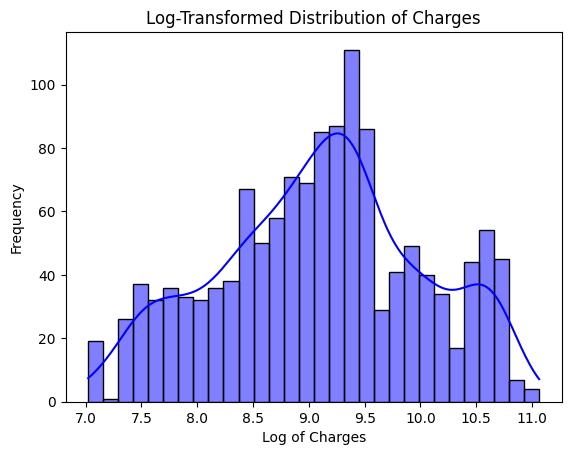

In [ ]:
New_target = np.log1p(enhanced_df['charges'])
sns.histplot(x=New_target , kde = 'True' ,color='blue', bins=30)
plt.title('Log-Transformed Distribution of Charges')
plt.xlabel('Log of Charges')
plt.ylabel('Frequency')
plt.show()  # much better

In [ ]:
# Preparing the input (X) and target (y) variables
X = enhanced_df.drop('charges', axis=1)  # Drop 'charges' column from the dataset to get features
y = New_target  # Assign the target variable

# Converting to numpy arrays
X = np.array(X)
y = np.array(y)

# Splitting the data into Training Set, Cross-Validation Set, and Test Set
X_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% for further split
X_cv, X_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=42)  # Split the remaining 40% into 50% for CV and 50% for test

# Deleting temporary variables
del x_, y_

# Displaying the shapes of the datasets and some sample values
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_cv: ", X_cv.shape)
print("Shape of y_cv: ", y_cv.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Displaying the first 5 samples from each set
print("\nFirst 5 samples of X_train:")
print(X_train[:5])
print("First 5 values of y_train:")
print(y_train[:5])

print("\nFirst 5 samples of X_cv:")
print(X_cv[:5])
print("First 5 values of y_cv:")
print(y_cv[:5])

print("\nFirst 5 samples of X_test:")
print(X_test[:5])
print("First 5 values of y_test:")
print(y_test[:5])

Shape of X:  (1338, 8)
Shape of y:  (1338,)
Shape of X_train:  (802, 8)
Shape of y_train:  (802,)
Shape of X_cv:  (268, 8)
Shape of y_cv:  (268,)
Shape of X_test:  (268, 8)
Shape of y_test:  (268,)

First 5 samples of X_train:
[[59.   27.72  3.    0.    0.    0.    1.    0.  ]
 [60.   25.74  0.    1.    0.    0.    1.    0.  ]
 [28.   34.77  0.    0.    0.    1.    0.    0.  ]
 [19.   28.4   1.    0.    0.    0.    0.    1.  ]
 [45.   27.5   3.    1.    0.    0.    0.    1.  ]]
First 5 values of y_train:
[9.54696501 9.4045558  8.17693203 7.75470408 9.06141104]

First 5 samples of X_cv:
[[18.   31.92  0.    0.    0.    0.    0.    0.  ]
 [27.   29.15  0.    1.    1.    0.    1.    0.  ]
 [26.   23.7   2.    1.    0.    0.    0.    1.  ]
 [53.   36.86  3.    0.    1.    1.    0.    0.  ]
 [54.   47.41  0.    0.    1.    0.    1.    0.  ]]
First 5 values of y_cv:
[ 7.69938071  9.81178312  8.1563183  10.75069489 11.06306053]

First 5 samples of X_test:
[[43.    26.7    2.     0.     1.    

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def evaluate_regression_performance(true_values, predicted_values):
    """
    This function evaluates the performance of a regression model using various metrics.
    It prints out detailed information about:
    1. Mean Squared Error (MSE)
    2. Scaled Mean Squared Error
    3. Mean Absolute Error (MAE)
    4. Root Mean Squared Error (RMSE)
    5. Mean Absolute Percentage Error (MAPE)
    """

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(true_values, predicted_values)
    print(f"--- Performance Evaluation ---")
    print(f"\n1. Mean Squared Error (MSE): {mse:.4f}")
    print("   - MSE calculates the average of the squared differences between the predicted and actual values. "
          "It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.\n")

    # Scaled Mean Squared Error (MSE/2)
    mse_scaled = mse / 2
    print(f"2. Scaled Mean Squared Error (MSE/2): {mse_scaled:.4f}")
    print("   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 "
          "to see a more normalized value.\n")

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(true_values, predicted_values)
    print(f"3. Mean Absolute Error (MAE): {mae:.4f}")
    print("   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the "
          "average magnitude of errors without considering their direction (positive or negative).\n")

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"4. Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. "
          "It is useful when you want to assess the absolute error and is particularly sensitive to large errors.\n")

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(true_values, predicted_values)
    print(f"5. Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print("   - MAPE expresses the error as a percentage of the actual values, providing a relative measure of prediction accuracy. "
          "It is useful when comparing performance across different datasets or models.\n")



# Decision Tree
- **Observation in Previous Notebook**:
  - The error from the linear regression model was notably high, indicating suboptimal performance.

- **Polynomial Regression Model**:
  - To address the issue, a polynomial regression model was fitted.
  - Initial results showed a gradual decrease in error, but the reduction was not substantial.
  - Even after applying gradient descent for optimization, the model's error did not decrease significantly.

- **Hyperparameter Tuning**:
  - Given the limitations of the polynomial regression model, we proceeded with hyperparameter tuning to further improve performance.

- **Next Steps**:
  - Subsequently, we explored fitting a decision tree model to assess its performance.



### Hyperparameter Tuning with Optuna for DecisionTreeRegressor

**Install Necessary Libraries**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
import optuna

### **Objective Function for Hyperparameter Optimization**

This function uses **Optuna** to optimize hyperparameters of the **DecisionTreeRegressor** by minimizing the **Mean Squared Error (MSE)** on the cross-validation set.



---

### **Key Concepts**:

1. **Optuna Hyperparameter Search**:
   - **max_depth** and **min_samples_split** are tuned by Optuna.
   
2. **DecisionTreeRegressor**:
   - A tree model with **max_depth** and **min_samples_split** to control complexity.

3. **Objective**:
   - Minimize **Mean Squared Error (MSE)** on cross-validation predictions.

 **Mean Squared Error (MSE) Formula**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left(y_{i} - \hat{y}_{i}\right)^2
$$
---

### **Summary**:

| Hyperparameter       | Range   | Purpose                                  |
|----------------------|---------|------------------------------------------|
| **max_depth**        | 2 to 50 | Controls tree depth (overfitting risk)   |
| **min_samples_split**| 2 to 50 | Controls node split complexity           |

---



## Define the Objective Function
**The objective function is where Optuna evaluates the model with different hyperparameters.**

In [ ]:
def objective(trial):
    max_depth_tu = trial.suggest_int("max_depth" , 2 , 50)
    min_samples_split = trial.suggest_int("min_samples_split" , 2 , 50)

    tree_model = DecisionTreeRegressor(max_depth=max_depth_tu , min_samples_split= min_samples_split , random_state=42)

    tree_model.fit(X_train , y_train)
    cv_predict = tree_model.predict(X_cv)
    mse = mean_squared_error(y_cv , cv_predict)
    return mse

**Create the Study and Optimize**

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective , n_trials = 200)

[I 2025-02-07 11:34:26,454] A new study created in memory with name: no-name-374a2f7d-c993-4bf2-9629-a0a44b53fc36
[I 2025-02-07 11:34:26,468] Trial 0 finished with value: 0.18533477475055787 and parameters: {'max_depth': 7, 'min_samples_split': 3}. Best is trial 0 with value: 0.18533477475055787.
[I 2025-02-07 11:34:26,476] Trial 1 finished with value: 0.15674219223620578 and parameters: {'max_depth': 35, 'min_samples_split': 20}. Best is trial 1 with value: 0.15674219223620578.
[I 2025-02-07 11:34:26,485] Trial 2 finished with value: 0.1466936365724121 and parameters: {'max_depth': 40, 'min_samples_split': 33}. Best is trial 2 with value: 0.1466936365724121.
[I 2025-02-07 11:34:26,493] Trial 3 finished with value: 0.15065823949231333 and parameters: {'max_depth': 33, 'min_samples_split': 41}. Best is trial 2 with value: 0.1466936365724121.
[I 2025-02-07 11:34:26,499] Trial 4 finished with value: 0.14729438606714654 and parameters: {'max_depth': 43, 'min_samples_split': 28}. Best is tr

### Best Hyperparameters Found: for A decision tree model

In [ ]:
print("Best Hyperparameters Found: for A decision tree model")
print(f"  Parameters: {study.best_params}")
print(f"  Best Objective Value /mse: {study.best_value}")
print("Best Trials Summary:")
print(f"  Trials: {study.best_trials}")

Best Hyperparameters Found: for A decision tree model
  Parameters: {'max_depth': 47, 'min_samples_split': 31}
  Best Objective Value /mse: 0.14635650273911943
Best Trials Summary:
  Trials: [FrozenTrial(number=11, state=1, values=[0.14635650273911943], datetime_start=datetime.datetime(2025, 2, 7, 11, 34, 26, 564090), datetime_complete=datetime.datetime(2025, 2, 7, 11, 34, 26, 583417), params={'max_depth': 47, 'min_samples_split': 31}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=50, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=50, log=False, low=2, step=1)}, trial_id=11, value=None), FrozenTrial(number=22, state=1, values=[0.14635650273911943], datetime_start=datetime.datetime(2025, 2, 7, 11, 34, 26, 810530), datetime_complete=datetime.datetime(2025, 2, 7, 11, 34, 26, 835828), params={'max_depth': 48, 'min_samples_split': 30}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_

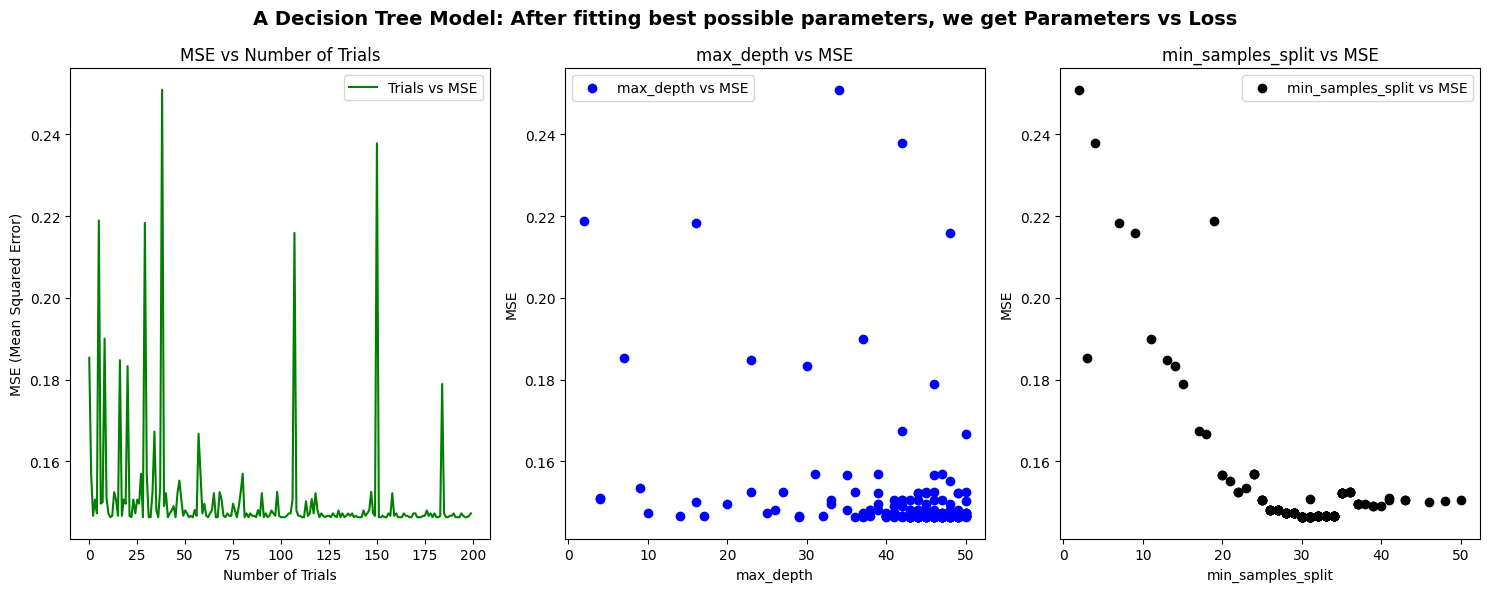

In [ ]:
import matplotlib.pyplot as plt

trials = study.trials_dataframe()

plt.figure(figsize=(15, 6))
plt.suptitle("A Decision Tree Model: After fitting best possible parameters, we get Parameters vs Loss", fontsize=14, fontweight='bold')
# First subplot (Number of Trials vs MSE)
plt.subplot(1, 3, 1)
plt.plot(trials['number'], trials['value'], c='green', label='Trials vs MSE')
plt.xlabel('Number of Trials')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('MSE vs Number of Trials')
plt.legend()

# Second subplot (Max Depth vs MSE) - FIXED
plt.subplot(1, 3, 2)
plt.scatter(trials['params_max_depth'], trials['value'], c='blue', label='max_depth vs MSE')
plt.ylabel('MSE')
plt.xlabel('max_depth')
plt.title('max_depth vs MSE')
plt.legend()

# Third subplot (Min Samples Split vs MSE) - FIXED
plt.subplot(1, 3, 3)
plt.scatter(trials['params_min_samples_split'], trials['value'], c='black', label='min_samples_split vs MSE')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.title('min_samples_split vs MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
best_params  = study.best_params
Insurance_DecisionTree = DecisionTreeRegressor(**best_params , random_state=42)
Insurance_DecisionTree.fit(X_train , y_train)
y_train_predict = Insurance_DecisionTree.predict(X_train)
print('For training set {Make no sense but }')
evaluate_regression_performance(y_train , y_train_predict)

For training set {Make no sense but }
--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1156
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0578
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.1852
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.3399
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage 

In [ ]:
y_cv_predict = Insurance_DecisionTree.predict(X_cv)
print('For CV set')
evaluate_regression_performance(y_cv , y_cv_predict)

For CV set
--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1464
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0732
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2188
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.3826
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0246%
   - 

In [ ]:
y_test_predict = Insurance_DecisionTree.predict(X_test)
print('For test set')
evaluate_regression_performance(y_test , y_test_predict)

For test set
--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1825
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0913
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2292
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.4272
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0250%
   

## Visualization of Optimization Results
**Optuna provides powerful visualizations to analyze the hyperparameter tuning process.**

In [ ]:
from optuna.visualization import plot_optimization_history , plot_param_importances

In [ ]:
plot_optimization_history(study=study).show()
plot_param_importances(study=study).show()

In [ ]:
feature_names = enhanced_df.drop('charges', axis=1).columns.tolist()
from sklearn.tree import  plot_tree
# Plot the tree
plt.figure(figsize=(120, 70))
plot_tree(Insurance_DecisionTree,
          filled=True,
          feature_names=feature_names,
          class_names=['Class 0', 'Class 1'],
          fontsize=12,
          max_depth=5)

plt.show()

### Saving the DecisionTree Model

In [ ]:
import joblib

# Define the path where the model will be saved
drive_path = "/content/drive/My Drive/Colab Notebooks/Insurance project/"

try:
    # Save the model to the specified path
    joblib.dump(Insurance_DecisionTree, drive_path + 'DecisionTree_model.pkl')
    print("A decision tree Model saved successfully!")
except Exception as e:
    print(f"Error saving the model: {e}")

A decision tree Model saved successfully!


### **Regression Tree Model: Variance Reduction for Splits**

#### **Objective**
In this notebook, we will construct a simple regression tree model by calculating the **variance reduction** after each split in the decision tree. Unlike classification problems that use information gain (based on entropy), regression trees aim to minimize the variance within each node. We will compute this variance reduction as a measure of the effectiveness of a split.

---

### **Key Concepts:**
1. **Variance**: A measure of how spread out the target variable (e.g., `y_train`) is within a set of data points. A lower variance indicates more homogeneity in the target variable.
2. **Variance Reduction**: The difference in variance before and after a split in the tree. A successful split reduces variance in the child nodes.
3. **Weighted Variance**: The combined variance from both left and right nodes, weighted by their size.
4. **Split Decision**: The model chooses the feature and threshold that maximizes variance reduction.

---


In [ ]:
import numpy as np

# Function to calculate variance of a list
def variance(y):
    if len(y) == 0:
        return 0
    return np.var(y)

# Function to calculate weighted variance
def weighted_variance(X, y, left_indices, right_indices):
    """
    This function calculates the weighted variance of the left and right splits.
    """
    w_left = len(left_indices) / len(X)
    w_right = len(right_indices) / len(X)

    # Variance for the left and right splits
    var_left = variance(y[left_indices])
    var_right = variance(y[right_indices])

    # Weighted variance
    weighted_var = w_left * var_left + w_right * var_right
    return weighted_var

# Function to calculate variance reduction
def variance_reduction(X, y, left_indices, right_indices):
    """
    This function calculates the variance reduction after a split.
    """
    var_node = variance(y)  # Variance at the current node
    w_variance = weighted_variance(X, y, left_indices, right_indices)
    return var_node - w_variance

# Function to split indices based on a feature
def split_indices(X, index_feature):
    left_indices = []
    right_indices = []
    for i, x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

# Function to select the best feature to split on
def best_feature_split(X, y):
    best_var_reduction = -float('inf')
    best_feature_index = None
    best_left_indices = None
    best_right_indices = None

    # Iterate over all features to find the one with the best variance reduction
    for index_feature in range(X.shape[1]):
        left_indices, right_indices = split_indices(X, index_feature)
        var_reduction = variance_reduction(X, y, left_indices, right_indices)

        # Keep track of the best feature based on variance reduction
        if var_reduction > best_var_reduction:
            best_var_reduction = var_reduction
            best_feature_index = index_feature
            best_left_indices = left_indices
            best_right_indices = right_indices

    return best_feature_index, best_left_indices, best_right_indices


# Find the best feature to split on
best_feature_index, left_indices, right_indices = best_feature_split(X_train, y_train)

# Calculate variance reduction for the best feature
var_reduction = variance_reduction(X_train, y_train, left_indices, right_indices)
feature_names = enhanced_df.drop('charges', axis=1).columns.tolist()
# Print variance reduction
print(f"Best feature to split on: Feature {best_feature_index} or {feature_names[best_feature_index]}")
print(f"Variance reduction after split on feature {best_feature_index}: {var_reduction}")
# Get column names for left and right trees
left_columns = [feature_names[i] for i in range(len(feature_names)) if X_train[left_indices, i].any()]
right_columns = [feature_names[i] for i in range(len(feature_names)) if X_train[right_indices, i].any()]

print(f"Column names for the left tree: {left_columns}")
print(f"Column names for the right tree: {right_columns}")

Best feature to split on: Feature 4 or smoker_yes
Variance reduction after split on feature 4: 0.36566989886055956
Column names for the left tree: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Column names for the right tree: ['age', 'bmi', 'children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']


### NOT SATISFIED
- **Comparison with Previous Models**:
  - It was observed that the error of the Decision Tree model was lower than that of the linear regression model in the previous notebook.
  - However, the error was still higher than expected, especially when compared to the polynomial regression model, which exhibited even better performance than the Decision Tree model in this notebook.

- **Decision to Explore Further**:
  - Based on these findings, we decided to explore further by fitting a Random Forest model.
  - The Random Forest model was initialized using the Decision Tree ensemble process to improve performance.


In [ ]:
def objectiveR(trialR):
    n_estimators_tuR = trialR.suggest_int('n_estimators' , 50 , 200)
    max_depth_tuR = trialR.suggest_int('max_depth' , 5 , 20)
    min_samples_split_tuR = trialR.suggest_int('min_samples_split' , 2 ,20)

    model = RandomForestRegressor(n_estimators=n_estimators_tuR , max_depth=max_depth_tuR , min_samples_split=min_samples_split_tuR)

    model.fit(X_train , y_train)
    y_cv_predict = model.predict(X_cv)
    mse = mean_squared_error(y_cv ,y_cv_predict)
    return mse
# Create the Optuna study for hyperparameter tuning



In [ ]:
studyR = optuna.create_study(direction = "minimize")
studyR.optimize(objectiveR , 200)

[I 2025-02-07 11:34:40,465] A new study created in memory with name: no-name-96b9e7f8-d313-4019-9b70-6e0e4dad325d
[I 2025-02-07 11:34:40,741] Trial 0 finished with value: 0.13836286852544663 and parameters: {'n_estimators': 71, 'max_depth': 20, 'min_samples_split': 6}. Best is trial 0 with value: 0.13836286852544663.
[I 2025-02-07 11:34:41,129] Trial 1 finished with value: 0.13140912682472322 and parameters: {'n_estimators': 154, 'max_depth': 15, 'min_samples_split': 10}. Best is trial 1 with value: 0.13140912682472322.
[I 2025-02-07 11:34:41,311] Trial 2 finished with value: 0.12996343777792693 and parameters: {'n_estimators': 81, 'max_depth': 8, 'min_samples_split': 16}. Best is trial 2 with value: 0.12996343777792693.
[I 2025-02-07 11:34:41,735] Trial 3 finished with value: 0.1321326116972484 and parameters: {'n_estimators': 174, 'max_depth': 19, 'min_samples_split': 10}. Best is trial 2 with value: 0.12996343777792693.
[I 2025-02-07 11:34:42,073] Trial 4 finished with value: 0.1302

In [ ]:
print("Best Hyperparameters Found: Random Forest ")
print(f"  Parameters: {studyR.best_params}")
print(f"  Best Objective Value /mse: {studyR.best_value}")
print("Best Trials Summary:")
print(f"  Trials: {studyR.best_trials}")

Best Hyperparameters Found: Random Forest 
  Parameters: {'n_estimators': 103, 'max_depth': 14, 'min_samples_split': 14}
  Best Objective Value /mse: 0.12610218744194468
Best Trials Summary:
  Trials: [FrozenTrial(number=158, state=1, values=[0.12610218744194468], datetime_start=datetime.datetime(2025, 2, 7, 11, 35, 25, 119865), datetime_complete=datetime.datetime(2025, 2, 7, 11, 35, 25, 383053), params={'n_estimators': 103, 'max_depth': 14, 'min_samples_split': 14}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'max_depth': IntDistribution(high=20, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1)}, trial_id=158, value=None)]


In [ ]:
trialsR = studyR.trials_dataframe()
trialsR.head(4)

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_min_samples_split,params_n_estimators,state
0,0,0.138363,2025-02-07 11:34:40.467727,2025-02-07 11:34:40.741205,0 days 00:00:00.273478,20,6,71,COMPLETE
1,1,0.131409,2025-02-07 11:34:40.742799,2025-02-07 11:34:41.129763,0 days 00:00:00.386964,15,10,154,COMPLETE
2,2,0.129963,2025-02-07 11:34:41.131348,2025-02-07 11:34:41.310859,0 days 00:00:00.179511,8,16,81,COMPLETE
3,3,0.132133,2025-02-07 11:34:41.312442,2025-02-07 11:34:41.735274,0 days 00:00:00.422832,19,10,174,COMPLETE


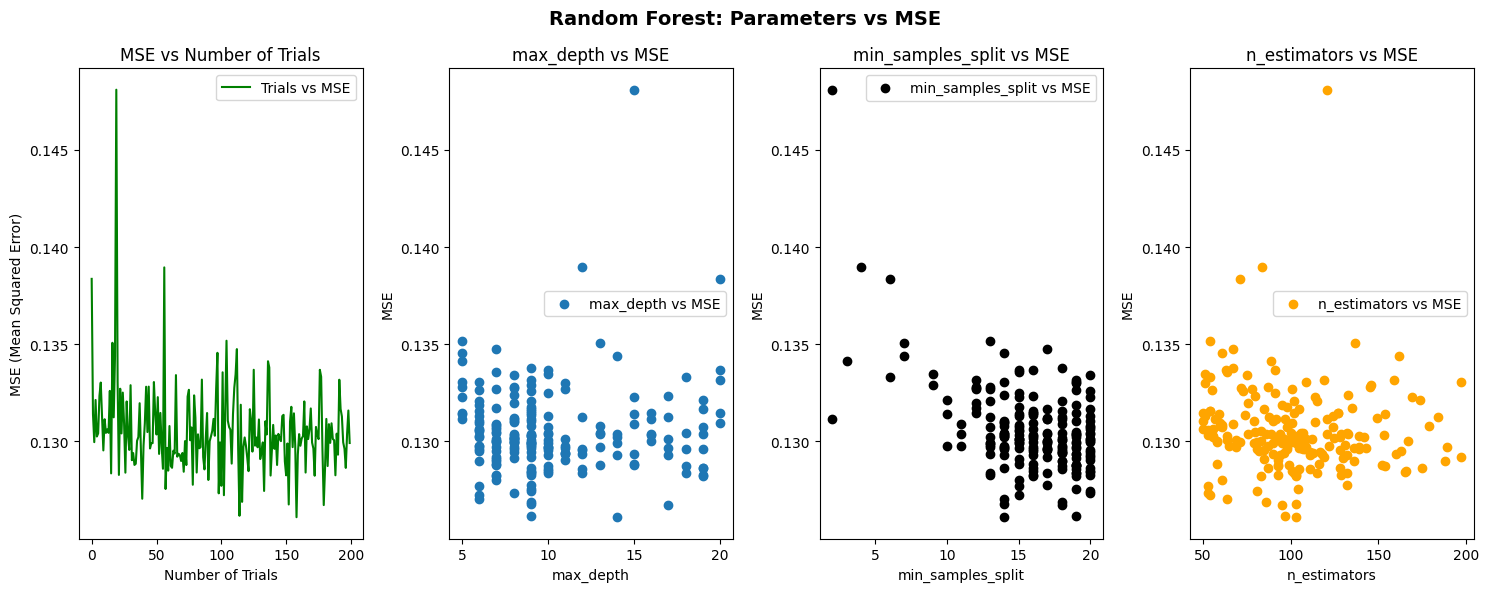

In [ ]:
import matplotlib.pyplot as plt

trialsR = studyR.trials_dataframe()

plt.figure(figsize=(15, 6))  # Increase the figure size to fit all plots neatly

# Add main heading
plt.suptitle("Random Forest: Parameters vs MSE", fontsize=14, fontweight='bold')

# First subplot: Number of Trials vs MSE
plt.subplot(1, 4, 1)
plt.plot(trialsR['number'], trialsR['value'], c='green', label='Trials vs MSE')
plt.xlabel('Number of Trials')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('MSE vs Number of Trials')
plt.legend()

# Second subplot: max_depth vs MSE
plt.subplot(1, 4, 2)
plt.scatter(trialsR['params_max_depth'], trialsR['value'], label='max_depth vs MSE')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('max_depth vs MSE')
plt.legend()

# Third subplot: min_samples_split vs MSE
plt.subplot(1, 4, 3)
plt.scatter(trialsR['params_min_samples_split'], trialsR['value'], c='black', label='min_samples_split vs MSE')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.title('min_samples_split vs MSE')
plt.legend()

# Fourth subplot: n_estimators vs MSE
plt.subplot(1, 4, 4)
plt.scatter(trialsR['params_n_estimators'], trialsR['value'], c='orange', label='n_estimators vs MSE')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('n_estimators vs MSE')
plt.legend()

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [ ]:
best_params_R = studyR.best_params
Insurance_Random_Forest = RandomForestRegressor(**best_params_R , random_state=42)
Insurance_Random_Forest.fit(X_train , y_train)
y_train_predictR = Insurance_Random_Forest.predict(X_train)
print('For training set (It make no sense still)')
evaluate_regression_performance(y_train , y_train_predictR)

For training set (It make no sense still)
--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.0876
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0438
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.1565
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.2960
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percent

In [ ]:
print('For CV set')
y_cv_predictR = Insurance_Random_Forest.predict(X_cv)
evaluate_regression_performance(y_cv , y_cv_predictR)

For CV set
--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1302
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0651
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2073
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.3608
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0232%
   - 

In [ ]:
print('For Test set')
y_test_predictR = Insurance_Random_Forest.predict(X_test)
evaluate_regression_performance(y_test , y_test_predictR)

For Test set
--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1604
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0802
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2065
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.4005
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0224%
   

## Visualization of Optimization Results For Random Forest
**Optuna provides powerful visualizations to analyze the hyperparameter tuning process.**

In [ ]:
from optuna.visualization import plot_optimization_history , plot_param_importances
plot_optimization_history(study=studyR).show()
plot_param_importances(study=studyR).show()

### Saving the Pre-Trained RandomForest Model


In [ ]:
import joblib

# Define the path where the model will be saved
drive_path = "/content/drive/My Drive/Colab Notebooks/Insurance project/"



try:
    # Save the Random Forest model to the specified path
    joblib.dump(Insurance_Random_Forest, drive_path + 'RandomForest_model.pkl')
    print("Random Forest model saved successfully!")
except Exception as e:
    print(f"Error saving the Random Forest model: {e}")


Random Forest model saved successfully!


### Exploring Model Optimization: From Decision Trees to XGBoost

In our journey of model optimization, we started by transitioning from decision trees to a random forest regression model, which has already shown promising results with a reduction in error. However, the question arises: can we push the error even lower?

While we acknowledge that this approach might not always be the most suitable—given its potential time constraints—we are determined to explore and experiment with other models to see if we can further improve performance.

One potential candidate for further optimization is **XGBoost**. Known for its speed and efficiency in handling large datasets, XGBoost has the potential to achieve even lower loss than traditional models. Let’s test this approach and see what results we can uncover in the quest for the best-performing model.  follow this link : https://colab.research.google.com/drive/1BY5QZcD0pitgSilODfVtPDrpqqLbMofe?usp=sharing